# Dataset

https://www.kaggle.com/datasets/piyushkumar18/animal-image-classification-dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("piyushkumar18/animal-image-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.47G/1.47G [01:10<00:00, 22.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/piyushkumar18/animal-image-classification-dataset/versions/1


In [2]:
import shutil
import os

# Create the destination directory if it doesn't exist.
destination_dir = os.getcwd()
os.makedirs(destination_dir, exist_ok=True)

# Move all files and subdirectories from the downloaded dataset path to the current directory
for item in os.listdir(path):
  source = os.path.join(path, item)
  destination = os.path.join(destination_dir, item)
  if os.path.isdir(source):
    shutil.move(source, destination)
  else:
    shutil.move(source, destination_dir)


print(f"Dataset moved to: {destination_dir}")

Dataset moved to: /content


In [3]:
import os
import random
import shutil

random.seed(43)

def split_dataset(source_dir, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    """Splits a dataset into train, validation, and test sets.

    Args:
        source_dir: Path to the directory containing the dataset.
        train_ratio: Proportion of the dataset to include in the train split.
        val_ratio: Proportion of the dataset to include in the validation split.
        test_ratio: Proportion of the dataset to include in the test split.
    """

    if train_ratio + val_ratio + test_ratio != 1.0:
        raise ValueError("Ratios must sum to 1.0")

    for class_name in os.listdir(source_dir):
        class_dir = os.path.join(source_dir, class_name)
        if os.path.isdir(class_dir):
            images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
            random.shuffle(images)  # Shuffle images for random splitting

            num_images = len(images)
            num_train = int(train_ratio * num_images)
            num_val = int(val_ratio * num_images)
            num_test = num_images - num_train - num_val

            # Create destination directories
            train_dir = os.path.join(source_dir, "train", class_name)
            os.makedirs(train_dir, exist_ok=True)
            val_dir = os.path.join(source_dir, "val", class_name)
            os.makedirs(val_dir, exist_ok=True)
            test_dir = os.path.join(source_dir, "test", class_name)
            os.makedirs(test_dir, exist_ok=True)

            # Split and move images
            for i, image in enumerate(images):
                source_path = os.path.join(class_dir, image)
                if i < num_train:
                    destination_path = os.path.join(train_dir, image)
                elif i < num_train + num_val:
                    destination_path = os.path.join(val_dir, image)
                else:
                    destination_path = os.path.join(test_dir, image)
                shutil.move(source_path, destination_path)

            # Remove original class directory after moving images
            os.rmdir(class_dir)

In [4]:
dataset_path = "Animal Image Dataset"
split_dataset(dataset_path)

In [26]:
import zipfile
import os

def zip_folder(folder_path, zip_file_name):
    """Zips a folder and its contents."""
    try:
        with zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, _, files in os.walk(folder_path):
                for file in files:
                    file_path = os.path.join(root, file)
                    arcname = os.path.relpath(file_path, folder_path)
                    zipf.write(file_path, arcname)
        print(f"Successfully zipped '{folder_path}' to '{zip_file_name}'")
    except FileNotFoundError:
        print(f"Error: Folder '{folder_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# zip_folder("Animal Image Dataset", "animal_image_dataset.zip")

Successfully zipped 'Animal Image Dataset' to 'animal_image_dataset.zip'


In [ ]:
# from google.colab import files
# files.download('animal_image_dataset.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Train

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 50.9 MB/s eta 0:00:00


In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-cls.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(
    data="/content/Animal Image Dataset",
    epochs=20,
    imgsz=224,
    batch=16,
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.52M/5.52M [00:00<00:00, 295MB/s]


Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/Animal Image Dataset, epochs=20, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 5.35M/5.35M [00:00<00:00, 312MB/s]


AMP: checks passed ✅


train: Scanning /content/Animal Image Dataset/train... 13734 images, 0 corrupt: 100%|██████████| 13734/13734 [00:03<00:00, 3726.73it/s]


train: New cache created: /content/Animal Image Dataset/train.cache


val: Scanning /content/Animal Image Dataset/val... 1715 images, 0 corrupt: 100%|██████████| 1715/1715 [00:01<00:00, 1278.84it/s]

val: New cache created: /content/Animal Image Dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20     0.296G      2.783         16        224:   1%|          | 9/859 [00:01<01:51,  7.62it/s]

       1/20     0.296G      2.731         16        224:   2%|▏         | 14/859 [00:03<02:41,  5.24it/s]
100%|██████████| 755k/755k [00:00<00:00, 68.3MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:11<00:00,  4.67it/s]

                   all      0.932      0.997



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:13<00:00,  3.90it/s]

                   all      0.941      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:11<00:00,  4.74it/s]

                   all      0.937      0.995



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:12<00:00,  4.17it/s]

                   all      0.939      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:12<00:00,  4.28it/s]

                   all      0.933      0.995



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:13<00:00,  4.09it/s]

                   all       0.94      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:13<00:00,  3.87it/s]

                   all      0.943      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:11<00:00,  4.85it/s]

                   all      0.947      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:14<00:00,  3.64it/s]

                   all      0.946      0.998



      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.271G     0.1933          6        224: 100%|██████████| 859/859 [03:25<00:00,  4.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:14<00:00,  3.74it/s]

                   all      0.953      0.998



      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.268G     0.1759          6        224: 100%|██████████| 859/859 [03:23<00:00,  4.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:12<00:00,  4.29it/s]

                   all      0.952      0.998



      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.268G     0.1525          6        224: 100%|██████████| 859/859 [03:21<00:00,  4.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:13<00:00,  3.97it/s]

                   all      0.958      0.998



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.268G      0.139          6        224: 100%|██████████| 859/859 [03:17<00:00,  4.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:12<00:00,  4.41it/s]

                   all      0.964      0.998



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.271G     0.1338          6        224: 100%|██████████| 859/859 [03:19<00:00,  4.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:12<00:00,  4.39it/s]

                   all      0.964      0.999



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.268G     0.1204          6        224: 100%|██████████| 859/859 [03:15<00:00,  4.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:11<00:00,  4.70it/s]

                   all      0.964      0.999



      Epoch    GPU_mem       loss  Instances       Size


      16/20     0.268G     0.1003          6        224: 100%|██████████| 859/859 [03:14<00:00,  4.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:15<00:00,  3.58it/s]

                   all      0.966      0.999



      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.268G    0.09155          6        224: 100%|██████████| 859/859 [03:35<00:00,  3.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:15<00:00,  3.59it/s]

                   all      0.967      0.999



      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.271G    0.08214          6        224: 100%|██████████| 859/859 [03:27<00:00,  4.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:15<00:00,  3.58it/s]

                   all      0.967      0.999



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.268G    0.07715          6        224: 100%|██████████| 859/859 [03:23<00:00,  4.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:12<00:00,  4.28it/s]

                   all      0.969      0.999



      Epoch    GPU_mem       loss  Instances       Size


      20/20     0.268G     0.0695          6        224: 100%|██████████| 859/859 [03:24<00:00,  4.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:13<00:00,  4.07it/s]

                   all      0.969      0.999



20 epochs completed in 1.189 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-cls summary (fused): 112 layers, 1,541,396 parameters, 0 gradients, 3.2 GFLOPs
train: /content/Animal Image Dataset/train... found 13734 images in 12 classes ✅ 
val: /content/Animal Image Dataset/val... found 1715 images in 12 classes ✅ 
test: /content/Animal Image Dataset/test... found 1728 images in 12 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 54/54 [00:10<00:00,  5.03it/s]


                   all      0.969      0.999
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


In [8]:
# Evaluate model on validation or test set
metrics = model.val(data="/content/Animal Image Dataset", split='test')
print(metrics)

Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
train: /content/Animal Image Dataset/train... found 13734 images in 12 classes ✅ 
val: /content/Animal Image Dataset/val... found 1715 images in 12 classes ✅ 
test: /content/Animal Image Dataset/test... found 1728 images in 12 classes ✅ 


test: Scanning /content/Animal Image Dataset/test... 1728 images, 0 corrupt: 100%|██████████| 1728/1728 [00:00<00:00, 3609.34it/s]

test: New cache created: /content/Animal Image Dataset/test.cache



               classes   top1_acc   top5_acc: 100%|██████████| 108/108 [00:15<00:00,  7.17it/s]


                   all      0.972      0.997
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7954428877f0>
curves: []
curves_results: []
fitness: 0.984375
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9716435074806213, 'metrics/accuracy_top5': 0.9971064925193787, 'fitness': 0.984375}
save_dir: PosixPath('runs/classify/train3')
speed: {'preprocess': 0.11331463853518169, 'inference': 0.9518256066022095, 'loss': 0.0009507768683963352, 'postprocess': 0.0011707069697203458}
task: 'classify'
top1: 0.9716435074806213
top5: 0.9971064925193787


In [9]:
# Predict the class of a new image
results = model.predict(source="00000004.jpg", imgsz=224)
print(results)


image 1/1 /content/00000004.jpg: 224x224 cats 1.00, sheep 0.00, monkey 0.00, dogs 0.00, elephant 0.00, 7.8ms
Speed: 171.9ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
[ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'butterfly', 1: 'cats', 2: 'cow', 3: 'dogs', 4: 'elephant', 5: 'hen', 6: 'horse', 7: 'monkey', 8: 'panda', 9: 'sheep', 10: 'spider', 11: 'squirrel'}
obb: None
orig_img: array([[[236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [228, 229, 227],
        [228, 229, 227],
        [228, 229, 227]],

       [[236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [228, 229, 227],
        [228, 229, 227],
        [228, 229, 227]],

       [[236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [228, 229, 227],
        [228, 229, 227],
        [228, 229, 227]],

       ...,

   


image 1/1 /content/00000004.jpg: 224x224 cats 1.00, sheep 0.00, monkey 0.00, dogs 0.00, elephant 0.00, 5.4ms
Speed: 86.7ms preprocess, 5.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


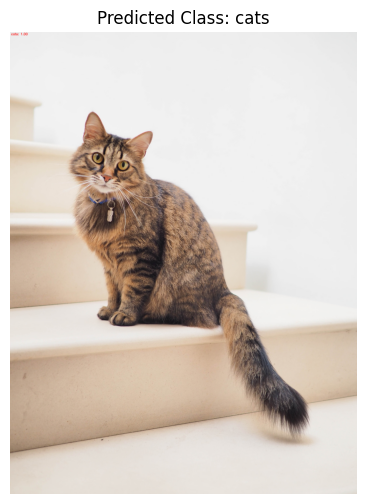

Predicted Class: cats, Probability: 1.0000


In [25]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Path to image for inference
image_path = "00000004.jpg"

# Make predictions
results = model.predict(source=image_path, imgsz=224)
probs = results[0].probs.data.tolist()
names_dict = results[0].names

# Taking predictions with maximum probability
max_prob = max(probs)
max_class = names_dict[np.argmax(probs)]

# show images
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

label = f"{max_class}: {max_prob:.2f}"
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image, label, (10, 30), font, 1, (255, 0, 0), 2, cv2.LINE_AA)

plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted Class: {max_class}")
plt.show()

print(f"Predicted Class: {max_class}, Probability: {max_prob:.4f}")

In [27]:
zip_folder("runs", "runs.zip")

Successfully zipped 'runs' to 'runs.zip'


In [28]:
from google.colab import files
files.download('runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>